<a href="https://colab.research.google.com/github/krishnakaushik25/Number-Plate-Recognition-OCR-Web-App/blob/main/03_Make_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [4]:
# load model
model = tf.keras.models.load_model('/content/drive/MyDrive/WhatsApp chat/object_detection.h5')
print('model loaded sucessfully')

model loaded sucessfully


In [5]:
path = '/content/drive/MyDrive/WhatsApp chat/images/N207.jpeg'
image = load_img(path) # PIL object
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output

In [6]:
# size of the orginal image
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)

Height of the image = 423
Width of the image = 541


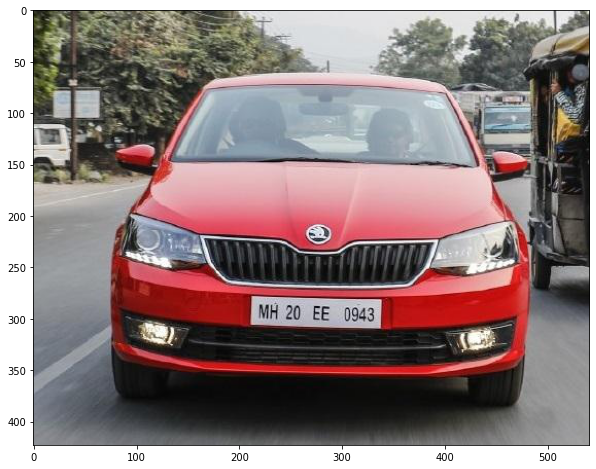

In [7]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [8]:
image_arr_224.shape

(224, 224, 3)

In [9]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [10]:
# make predictions
coords = model.predict(test_arr)
coords

array([[0.37619495, 0.61287683, 0.65178967, 0.73356736]], dtype=float32)

In [11]:
# denormalize the values
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[203.52147007, 331.56636637, 275.70702839, 310.29899204]])

In [12]:
coords = coords.astype(np.int32)
coords

array([[203, 331, 275, 310]], dtype=int32)

(203, 275) (331, 310)


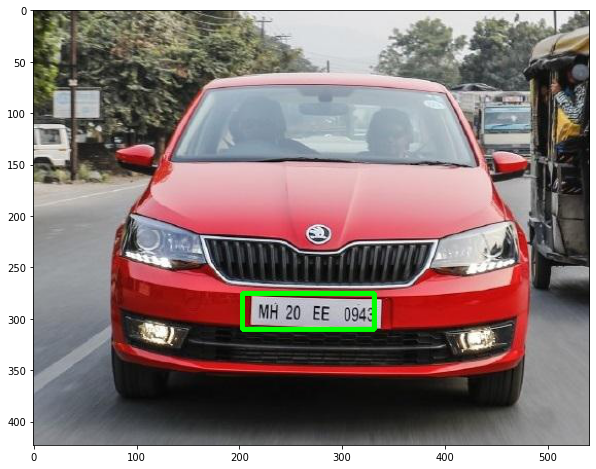

In [13]:
# draw bounding on top the image
xmin, xmax,ymin,ymax = coords[0]
pt1 =(xmin,ymin)
pt2 =(xmax,ymax)
print(pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [15]:
# create pipeline
path = '/content/drive/MyDrive/WhatsApp chat/images/N207.jpeg'
def object_detection(path):
    # read image
    image = load_img(path) # PIL object
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    # data preprocessing
    image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    # make predictions
    coords = model.predict(test_arr)
    # denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    # draw bounding on top the image
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

(419, 541) (602, 587)


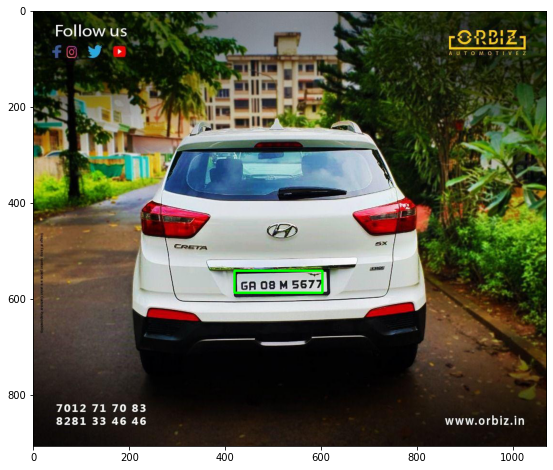

In [17]:
path = '/content/drive/MyDrive/WhatsApp chat/images/N147.jpeg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

# Optical Character Recognition - OCR

In [40]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [41]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

(203, 275) (331, 310)


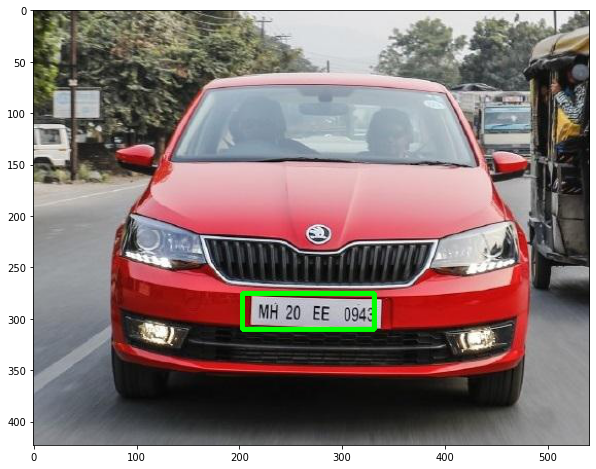

In [42]:
path = '/content/drive/MyDrive/WhatsApp chat/images/N207.jpeg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [43]:
img = np.array(load_img(path))
xmin ,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]

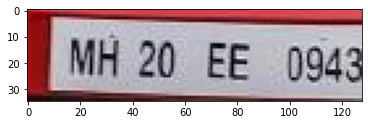

In [63]:

plt.imshow(roi)
plt.show()

In [58]:

!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [59]:
try:
 from PIL import Image
except ImportError:
 import Image
import cv2
import pytesseract

In [60]:
!which tesseract

/usr/bin/tesseract


In [61]:
pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

In [62]:
text = pytesseract.image_to_string(roi)
print(text)

MH 20 EE 0943

